<Axes: xlabel='hardness', ylabel='mortality'>

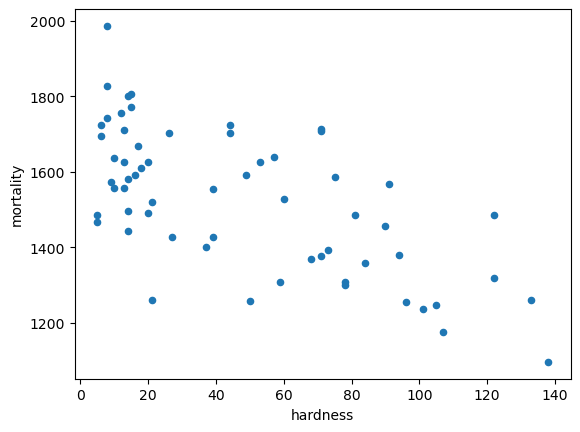

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Shevchenko-AV/python_basics/main/water.csv'
df = pd.DataFrame()
try:
    df = pd.read_csv(url)
except:
    pass
finally:
    if df.empty:
        df = pd.read_csv('water.csv')
df.plot(kind='scatter', x='hardness', y='mortality')

In [2]:
print('Коэффициент корреляции Пирсона')
df[['hardness', 'mortality']].corr()

Коэффициент корреляции Пирсона


,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [3]:
print('Коэффициент корреляции Спирмана')
df[['hardness', 'mortality']].corr(method='spearman')

Коэффициент корреляции Спирмана


,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Построим модель линейной регрессии и рассчитаем коэффициент детерминации с помощью Scikit-learn
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[-3.28281845]
1683.9212680875548


In [5]:
model.score(X_test, y_test)

0.5099679408034544

In [6]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Теперь построим модель линейной регрессии и рассчитаем коэффициент детерминации с помощью statsmodels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     31.60
Date:                Fri, 21 Dec 2023   Prob (F-statistic):           1.07e-06
Time:                        23:22:15   Log-Likelihood:                -308.17
No. Observations:                  48   AIC:                             620.3
Df Residuals:                      46   BIC:                             624.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1683.9213     34.526     48.773      0.0

Точечный график остатков


Text(0, 0.5, 'Остатки')

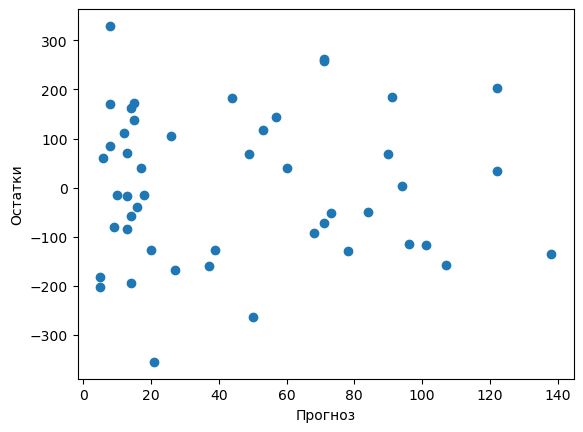

In [7]:
print('Точечный график остатков')
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

График остатков - гистограмма


(array([1., 0., 1., 0., 2., 4., 5., 3., 5., 4., 1., 3., 5., 3., 2., 5., 1.,
        1., 1., 1.]),
 array([-354.98208057, -320.76591256, -286.54974456, -252.33357655,
        -218.11740855, -183.90124054, -149.68507254, -115.46890453,
         -81.25273652,  -47.03656852,  -12.82040051,   21.39576749,
          55.6119355 ,   89.8281035 ,  124.04427151,  158.26043951,
         192.47660752,  226.69277552,  260.90894353,  295.12511153,
         329.34127954]),
 <BarContainer object of 20 artists>)

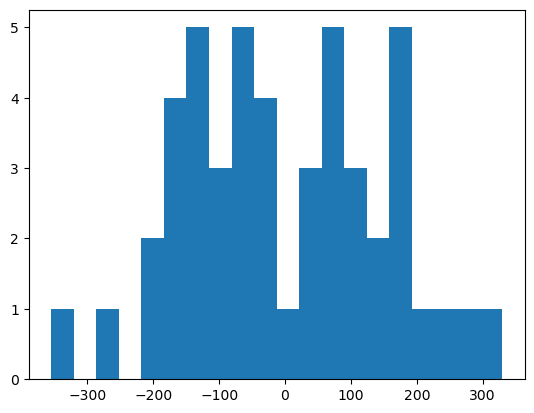

In [8]:
print('График остатков - гистограмма')
plt.hist(results.resid, bins=20)

In [9]:
print('По точечному графику может показаться, что зависимость обратная линейная, но:')
print('1. Коэффициент детерминации стремится к нулю, а не к единице')
print('2. В остатках есть резкие выбросы')
print('3. График гистограмма остатков отличается от графика нормального распределения')
print('Возможно, стоит учитывать и другие независимые переменные. Например, город.')
print('Из чего можно сделать вывод, что взаимосвязи либо нет, либо она более сложная, чем обратно линейная')

По точечному графику может показаться, что зависимость обратная линейная, но:
1. Коэффициент детерминации стремится к нулю, а не к единице
2. В остатках есть резкие выбросы
3. График гистограмма остатков отличается от графика нормального распределения
Возможно, стоит учитывать и другие независимые переменные. Например, город.
Из чего можно сделать вывод, что взаимосвязи либо нет, либо она более сложная, чем обратно линейная
